In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Read the file Advertising.csv
data = pd.read_csv('../input/Advertising.csv')
data.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [15]:
# Give the dimensions of the dataset
data.shape

(200, 5)

In [16]:
# Drop the column Unnamed: 0
data = data.drop('Unnamed: 0', axis = 1)
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [17]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

def rounddown(x):
    return int(math.floor(x / 10.0)) * 10

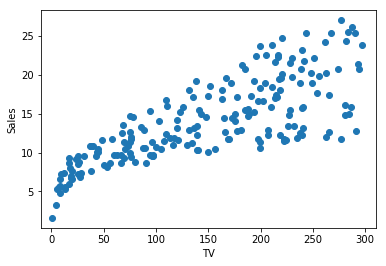

In [18]:
# Plot the dataset Sales vs TV
# First calculate the minimum and the maximumvalue for TV
xminTV = rounddown(data['TV'].min()) - 10
xmaxTV = roundup(data['TV'].max()) + 10
plt.scatter(data['TV'], data['Sales'])
plt.xlim([xminTV, xmaxTV])
plt.xlabel('TV')
plt.ylabel('Sales')

In [19]:
# Plot the dataset Sales vs Radio
# First calculate the minimum and the maximumvalue for Radio
xminRadio = rounddown(data['Radio'].min()) - 10
xmaxRadio = roundup(data['Radio'].max()) + 10
plt.scatter(data['Radio'], data['Sales'])
plt.xlim([xminRadio, xmaxRadio])
plt.xlabel('Radio')
plt.ylabel('Sales')


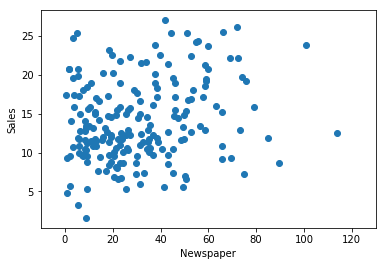

In [20]:
# Plot the dataset Sales vs Newspaper
# First calculate the minimum and the maximumvalue for Newspaper
xminNewspaper = rounddown(data['Newspaper'].min()) - 10
xmaxNewspaper = roundup(data['Newspaper'].max()) + 10
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlim([xminNewspaper, xmaxNewspaper])
plt.xlabel('Newspaper')
plt.ylabel('Sales')


In [21]:
# Use LinearRegression to predict the Sales
from sklearn.model_selection import train_test_split
X = data.drop('Sales',axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [22]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [23]:
# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the slope:
print("Slope")
print(model.coef_)
print()

Intercept
3.069205892571306

Slope
[ 0.04600126  0.19143234 -0.00823846]



In [24]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1.1429310511532458

Mean Squared Error: 2.1226076591115945

Root Mean Squared Error: 1.4569171764762727

R square: 0.9235342728624106

